In [1]:
import pandas as pd
data1 = pd.read_csv(r"C:\Users\vishw\Downloads\Preprocessed_data.csv",date_parser='date',parse_dates=True)
data1.head()

,date,pm25,year,month,Day,hour,dayofweek
0,2018-01-01 00:00:00,423.0,2018,Jan,1,0,Monday
1,2018-01-01 01:00:00,414.0,2018,Jan,1,1,Monday
2,2018-01-01 02:00:00,417.0,2018,Jan,1,2,Monday
3,2018-01-01 03:00:00,466.0,2018,Jan,1,3,Monday
4,2018-01-01 04:00:00,470.0,2018,Jan,1,4,Monday


### Data Driven Method

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Data Splitting

In [3]:
Train = data1.head(2350)
Test = data1.tail(24)

Moving Average

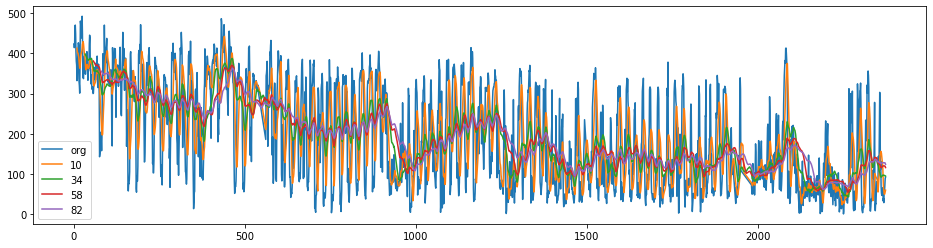

In [4]:
plt.figure(figsize=(16,4))
data1.pm25.plot(label="org")
for i in range(10,100,24):
    data1["pm25"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

### Decomposition plot

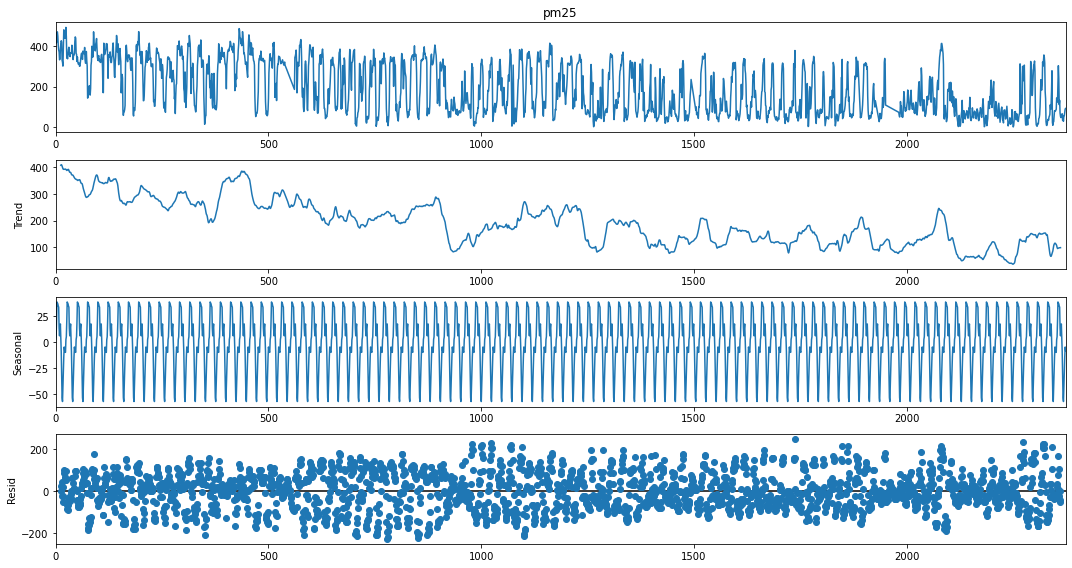

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data1['pm25'],freq=24)
decompose_ts_add.plot()
plt.show()

### ACF plots and PACF plots

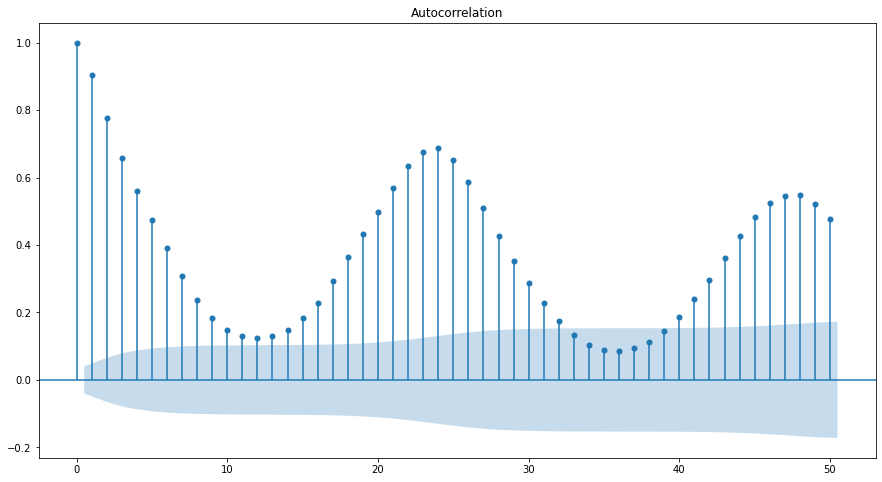

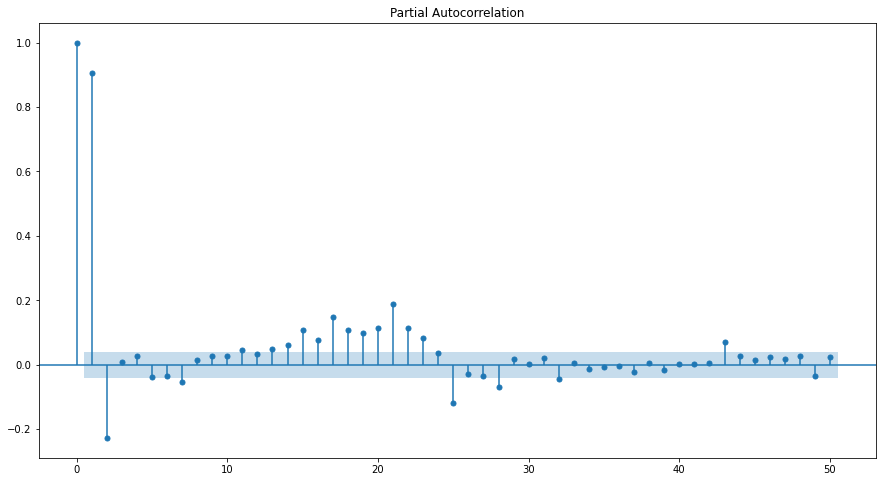

In [6]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data1.pm25,lags=50)
tsa_plots.plot_pacf(data1.pm25,lags=50)
plt.show()

## Evaluation RMSE

In [7]:
def RMSE(pred,org):
    temp = np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return np.mean(temp)

### Simple Exponential Method

In [8]:
ses_model = SimpleExpSmoothing(Train["pm25"]).fit(smoothing_level=0.3)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
RMSE(pred_ses,Test.pm25) 

72.14972807994378

### Holt's method 

In [9]:
hw_model = Holt(Train["pm25"]).fit(smoothing_level=0.3, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
RMSE(pred_hw,Test.pm25) 

80.9404635013287

### Holt's winter exponential smoothing with additive seasonality and additive trend

In [10]:
hwe_model_add_add = ExponentialSmoothing(Train["pm25"],seasonal="add",trend="add",seasonal_periods=24).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
RMSE(pred_hwe_add_add,Test.pm25)

40.52337833088661

### Holt's winter exponential smoothing with multiplicative seasonality and additive trend

In [11]:
hwe_model_mul_add = ExponentialSmoothing(Train["pm25"],seasonal="mul",trend="add",seasonal_periods=24).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
RMSE(pred_hwe_mul_add,Test.pm25)

75.8514577913739

## Evaluation Metric MAPE

In [12]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [13]:
ses_model = SimpleExpSmoothing(Train["pm25"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.pm25) 

44.700612744071556

### Holt method 

In [14]:
# Holt method 
hw_model = Holt(Train["pm25"]).fit(smoothing_level=0.3, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.pm25) 

41.63655144727617

### Holts winter exponential smoothing with additive seasonality and additive trend

In [15]:
hwe_model_add_add = ExponentialSmoothing(Train["pm25"],seasonal="add",trend="add",seasonal_periods=24).fit() 
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.pm25) 

33.208300282801694

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [16]:
hwe_model_mul_add = ExponentialSmoothing(Train["pm25"],seasonal="mul",trend="add",seasonal_periods=24).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.pm25)

38.47073830642696

## Final Model by combining train and test

In [17]:
#Compare the results 
print(" RMSE Values and MAPE values with Data Driven Approach:")
data = {"MODEL":pd.Series(["ses_model","hw_model","hwe_model_add_add","hwe_model_mul_add"]),"RMSE_Values":pd.Series([RMSE(pred_ses,Test.pm25),RMSE(pred_hw,Test.pm25),RMSE(pred_hwe_add_add,Test.pm25),RMSE(pred_hwe_mul_add,Test.pm25)]),"MAPE_Values":pd.Series([MAPE(pred_ses,Test.pm25),MAPE(pred_hw,Test.pm25),MAPE(pred_hwe_add_add,Test.pm25),MAPE(pred_hwe_mul_add,Test.pm25)])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values','MAPE_Values'])

 RMSE Values and MAPE values with Data Driven Approach:


,MODEL,RMSE_Values,MAPE_Values
2,hwe_model_add_add,40.523378,33.208300
0,ses_model,71.589438,44.700613
3,hwe_model_mul_add,75.851458,38.470738
1,hw_model,80.940464,41.636551


From above RMSE_values and MAPE_values we can conclude that "Holts winter exponential smoothing with additive seasonality and additive trend" gives minimum values.

In [18]:
hwe_model_add_add = ExponentialSmoothing(Train["pm25"],seasonal="add",trend="add",seasonal_periods=24).fit()

In [19]:
#Forecasting for next 24 time periods
print("PM 2.5 Forecasted values for next 24 hours:")
hwe_model_add_add.forecast(24)

PM 2.5 Forecasted values for next 24 hours:


2350     92.365083
2351    104.729639
2352    141.069360
2353    166.400637
2354    189.374173
2355    200.565391
2356    192.542962
2357    181.187402
2358    161.753280
2359    146.961664
2360    129.030095
2361    116.627686
2362    107.681813
2363     89.921641
2364     62.518999
2365     66.552098
2366     38.130934
2367     34.473886
2368     20.638509
2369     21.896363
2370     57.998066
2371     69.629263
2372     85.151957
2373     73.407579
dtype: float64

#### Forecasted Graph for next 24hours

<AxesSubplot:xlabel='Date', ylabel='pm2.5'>

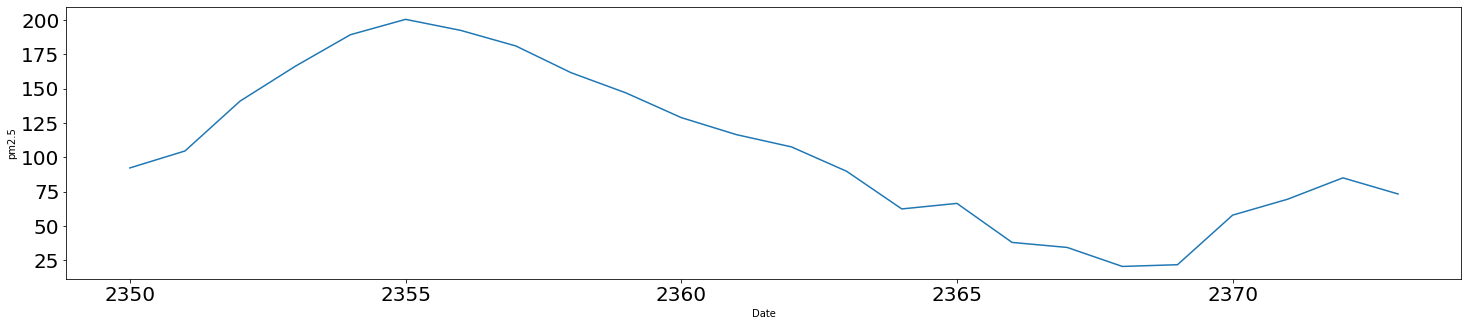

In [20]:
hwe_model_add_add.forecast(24).plot(kind='line', figsize=(25,5),xlabel='Date',ylabel='pm2.5', fontsize=20)